In [3]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reddit = praw.Reddit(
    # client_id="ClientID",
    # client_secret="API Key",
    # user_agent="Username",
    
)

subreddit = reddit.subreddit("udub")

count = 0
new = []
hot = []
top = []
rising = []
controversial = []

In [4]:
new = []
for submission in subreddit.new(limit=None):
    new.append([submission.id, submission.title, submission.selftext, submission.link_flair_text, submission.url])

df_new = pd.DataFrame(new, columns=['ID', 'Title', 'Text', 'Flair', 'URL'])

In [5]:
hot = []
for submission in subreddit.hot(limit=None):
    hot.append([submission.id, submission.title, submission.selftext, submission.link_flair_text, submission.url])

df_hot = pd.DataFrame(hot, columns=['ID', 'Title', 'Text', 'Flair', 'URL'])

In [6]:
top = []
for submission in subreddit.top(limit=None):
    top.append([submission.id, submission.title, submission.selftext, submission.link_flair_text, submission.url])

df_top = pd.DataFrame(top, columns=['ID', 'Title', 'Text', 'Flair', 'URL'])

In [7]:
rising = []
for submission in subreddit.rising(limit=None):
    rising.append([submission.id, submission.title, submission.selftext, submission.link_flair_text, submission.url])

df_rising = pd.DataFrame(rising, columns=['ID', 'Title', 'Text', 'Flair', 'URL'])

In [8]:
controversial = []
for submission in subreddit.controversial(limit=None):
    controversial.append([submission.id, submission.title, submission.selftext, submission.link_flair_text, submission.url])

df_controversial = pd.DataFrame(controversial, columns=['ID', 'Title', 'Text', 'Flair', 'URL'])

In [9]:
df_all = pd.concat([df_new, df_hot, df_top, df_rising, df_controversial])
df_all = df_all.drop_duplicates(subset='ID')

df_all.shape

(2909, 5)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_new = pd.read_csv("df_new.csv")
df_controversial = pd.read_csv("df_controversial.csv")
df_hot = pd.read_csv("df_hot.csv")
df_rising = pd.read_csv("df_rising.csv")
df_top = pd.read_csv("df_top.csv")

# Combine all dataframes
df_new['Category'] = 'new'
df_hot['Category'] = 'hot'
df_top['Category'] = 'top'
df_rising['Category'] = 'rising'
df_controversial['Category'] = 'controversial'

df_all = pd.concat([df_new, df_hot, df_top, df_rising, df_controversial])
df_all = df_all.drop_duplicates(subset='ID')

df_all.to_csv('df_all.csv')

df_all


# Among the entire dataset of posts, how frequently are they flaired?

Given our preliminary data analysis on a small subset of our data, we expect the split of non-flaired posts to flaired posts to be about 60-40 percent.

### How can we isolate the flaired and non-flaired posts?

Flaired posts are split up into 10 different flairs on r/udub, and can be tedious to filter through. However, non-flaired posts do not have a value in the 'Flair' column, so we can split up the two categories with isnull() and notnull().

In [10]:
no_flair = df_all[df_all['Flair'].isnull()]
flair = df_all[df_all['Flair'].notnull()]

no_flair.head(5)

,ID,Title,Text,Flair,URL
0,1casokh,uw acad,hello! i recently got accepted into the uw aca...,None,https://www.reddit.com/r/udub/comments/1casokh...
1,1card8x,"Police suggest UW athletics staff knew about, ...",,None,https://www.union-bulletin.com/sports/college_...
2,1caqd65,Do people use bots to enroll in classes?,I am on notification for a class thats full an...,None,https://www.reddit.com/r/udub/comments/1caqd65...
4,1cancft,Brotherhood Initiative?,I just got an email asking if I want to join t...,None,https://www.reddit.com/r/udub/comments/1cancft...
6,1cakz46,UWPD Presence on 15th Ave?,Around 12:30pm today there were three or four ...,None,https://www.reddit.com/r/udub/comments/1cakz46...


In [11]:
flair.head(5)

,ID,Title,Text,Flair,URL
3,1caq03d,I messed up (Phys123),I'm a first-year student but got into UW havin...,Advice,https://www.reddit.com/r/udub/comments/1caq03d...
5,1calq9z,Non-DTC engineering major placement confusion,I've always sort of understood from people I'v...,Discussion,https://www.reddit.com/r/udub/comments/1calq9z...
11,1cafobd,Demand remains high for the UW Food Pantry,,Student Life,https://www.dailyuw.com/news/demand-remains-hi...
13,1cadt9j,anybody need summer housing?,"Hello everyone,\n\nI'm looking to sublease my ...",Discussion,https://www.reddit.com/r/udub/comments/1cadt9j...
16,1ca1l85,Are you or do you know of a UW student who tra...,\n\n[View Poll](https://www.reddit.com/poll/1c...,Poll,https://www.reddit.com/r/udub/comments/1ca1l85...


In [12]:
num_no_flair = len(no_flair)
num_flair = len(flair)

num_no_flair, num_flair

(2019, 890)

In [13]:
num_no_flair * 100 / len(df_all), num_flair * 100 / len(df_all)

(69.40529391543485, 30.594706084565143)

Getting the values of flaired to non-flaired posts, we can see that the ratio of non-flaired posts to flaired posts is about a 70-30 percent split.

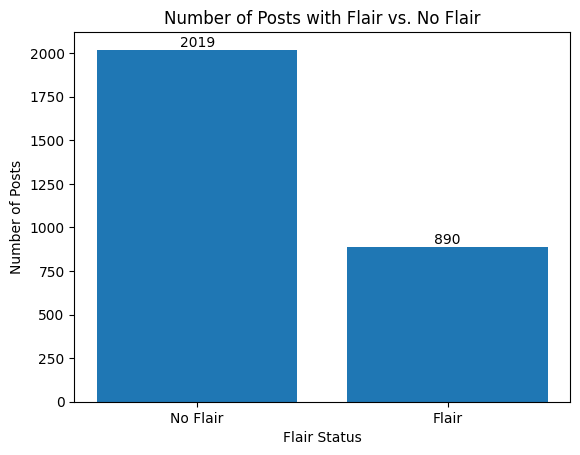

In [14]:
_ = plt.bar(['No Flair', 'Flair'], [num_no_flair, num_flair])
for bar in _:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')
_ = plt.xlabel('Flair Status')
_ = plt.ylabel('Number of Posts')
_ = plt.title('Number of Posts with Flair vs. No Flair')

Graphing the ratio allows us to visualize the split, as well as put the percentages into context with the number of total posts per bar.

The 70-30 split differs from our initial hypothesis of a 60-40 split. Because we expanded our analysis from a small subset to posts from five different data categories, additional research needs to be done to identify flaired and non-flaired post trends within all of these categories.

We acknowledge that because of the nature of the Reddit API and of the categories themselves, the number of posts in each category differs, and this has an impact on the ratio of flaired to non-flaired posts.

In [15]:
# grouped = df_all.groupby('Flair')

# for flair, data in grouped:
#     globals()[f'df_{flair}'] = data

# df_Advice.head(5)

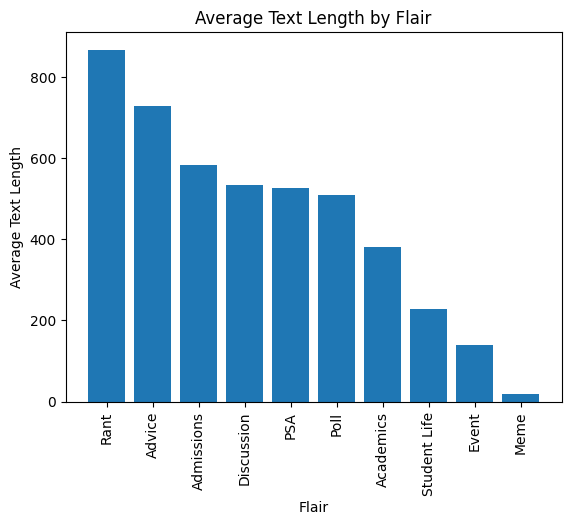

In [16]:
df_all["Text Length"] = df_all["Text"].apply(len)
average_text_length = df_all.groupby('Flair')["Text Length"].mean().sort_values(ascending=False)
_ = plt.bar(average_text_length.index, average_text_length)
_ = plt.xlabel('Flair')
_ = plt.ylabel('Average Text Length')
_ = plt.title('Average Text Length by Flair')
_ = plt.xticks(rotation=90)